Code used to generate figure 5A

In [2]:
import glob
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import BootstrapFunctions as bsf

ibm_pal_rb = sns.blend_palette(['#648fff','#785ef0','#dc267f',],as_cmap=True)
ibm_full_list = ['#648fff','#785ef0','#dc267f','#fe6100','#ffb000','#000000','#ffffff']
category_palette = sns.color_palette(['#648fff','#785ef0','#dc267f',],as_cmap=True)
paramlist = ['lambda','beta_x','gamma','beta_y','alpha','beta_z','nx','Kx','ny','Ky','offset']

In [4]:
#folders = ['Data/IntHill_consistent_violations_test/06-26 1235/system_6','Data/IntHill_consistent_violations_test/06-26 1235/system_0']
folders = glob.glob('Data/Manypoints_IntHill_con*/09-13 2124/*')
dat = []
failedsims = []
bootstrapdicts = []

for i,folder in enumerate(folders):
    files = glob.glob(folder+'/*data.csv',recursive=True)
    for j,f in enumerate(files):
        data = pd.read_csv(f)
        if (data[['Cov Bal xx','Cov Bal yy','Cov Bal xy','Cov Bal xz','Cov Bal yz','Cov Bal zz']] > 0.05).any(axis=1).any():
            failedsims.append(f)
            continue
        data = data.reset_index().rename(columns={'index':'perturbation'})
        numstrings = f.split("_")[-2].split('n')
        data['fileda'] = float(numstrings[1])
        data['filedb'] = float(numstrings[2])
        data['sysname'] = "/".join(f.split("/")[:-1])
        data['fileN'] = (data['gamma'].var(ddof=0)/data['gamma'].mean()**2)/(data['lambda'].var(ddof=0)/data['lambda'].mean()**2)
        data.rename(columns={'F_<x>':'F_<x> (wrong)','F_<y>':'F_<y> (wrong)'},inplace=True)
        dat.append(data)
        bsdict = bsf.pertexp_interpret(data,'all',analysed_columns=['<x>','<y>','<z>',"<F_x>","<F_y>"],nperts=121)
        timescale = data['beta_x']/data['beta_y']
        eta_xy = data['Cov(xy)']/(data['<x>']*data['<y>'])
        eta_xx = data['Var(x)']/(data['<x>']**2)
        eta_yy = data['Var(y)']/(data['<y>']**2)
        bsdict['consistent fy count (stoch)'] = np.sum(np.sign(data['<F_y>']))
        bsdict['consistent fx count (stoch)'] = np.sum(np.sign(1-data['<F_x>']))
        bsdict['input b variability'] = data['gamma'].var(ddof=0)/data['gamma'].mean()**2
        bsdict['fileN'] = data['fileN'][0]
        bsdict['fileda'] = float(numstrings[1])
        bsdict['filedb'] = float(numstrings[2])
        bsdict['sysname'] = "/".join(f.split("/")[:-1])
        for p in paramlist:
            bsdict[p] = data[p][0]
        bootstrapdicts.append(bsdict)
pertdata = pd.concat(dat)
pertdata = pertdata.set_index(["fileN",'fileda','filedb','sysname','perturbation'])
bootstrapped_res = pd.DataFrame(bootstrapdicts)

In [ ]:
pertdata

Exec Time    Sim Time  \
fileN fileda filedb sysname             perturbation                           
25.0  0.01   0.05   09-13 2124/system_0 0               590215.0  65762500.0   
                                        1               604337.0  65743600.0   
                                        2              3071850.0  65753700.0   
                                        3             12349500.0  68732600.0   
                                        4             13692000.0  68741700.0   
...                                                          ...         ...   
                                        358             567924.0  92339200.0   
                                        359             568584.0  92316600.0   
                                        360             232399.0  38421900.0   
                                        361             232451.0  38423300.0   
                                        362             233724.0  38424200.0   

                                                             Steps  \
fileN fileda filedb sysname             perturbation                 
25.0  0.01   0.05   09-13 2124/system_0 0             3.699710e+09   
                                        1             3.699290e+09   
                                        2             3.700850e+09   
                                        3             3.858660e+09   
                                        4             3.857500e+09   
...                                                            ...   
                                        358           4.757740e+09   
                                        359           4.757310e+09   
                                        360           1.922100e+09   
                                        361           1.922710e+09   
                                        362           1.922530e+09   

                                                      Flux Bal x  Flux Bal y  \
fileN fileda filedb sysname             perturbation                           
25.0  0.01   0.05   09-13 2124/system_0 0               0.000168    0.000050   
                                        1               0.000077    0.000017   
                                        2               0.000074    0.000012   
                                        3               0.000079    0.000023   
                                        4               0.000038    0.000025   
...                                                          ...         ...   
                                        358             0.000169    0.000004   
                                        359             0.000080    0.000026   
                                        360             0.000125    0.000039   
                                        361             0.000006    0.000116   
                                        362             0.000072    0.000069   

                                                      Flux Bal z  Cov Bal xx  \
fileN fileda filedb sysname             perturbation                           
25.0  0.01   0.05   09-13 2124/system_0 0               0.000111    0.000170   
                                        1               0.000006    0.000448   
                                        2               0.000096    0.000325   
                                        3               0.000225    0.000458   
                                        4               0.000061    0.000155   
...                                                          ...         ...   
                                        358             0.000164    0.000133   
                                        359             0.000043    0.000241   
                                        360             0.000039    0.000108   
                                        361             0.000184    0.000301   
                                        362             0.000091    0.000468   

                     

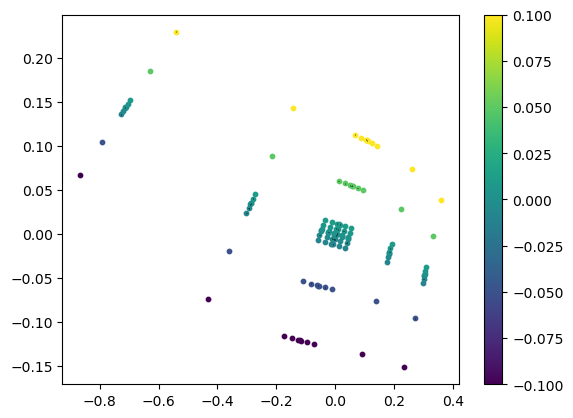

In [ ]:
x_0 = pertdata['<x>'].iloc[0:3].mean()
y_0 = pertdata['<y>'].iloc[0:3].mean()
gamma_0 = pertdata['gamma'].iloc[0:3].mean()
lambda_0 = pertdata['lambda'].iloc[0:3].mean()
for i in range(121):
    indices = [i*3,i*3+1,i*3+2]
    avgloc = pertdata['<x>'].iloc[indices].mean(),pertdata['<y>'].iloc[indices].mean()
    stddev = pertdata['<x>'].iloc[indices].std(),pertdata['<y>'].iloc[indices].std()
    plt.errorbar(1-avgloc[0]/x_0,1-avgloc[1]/y_0,
                 xerr=stddev[0]/x_0,yerr=stddev[1]/y_0,
                 fmt='',elinewidth=0.5,c='k',zorder=2)
    plt.scatter(1-avgloc[0]/x_0,1-avgloc[1]/y_0,s=10,c=(1-pertdata['lambda'].iloc[indices].mean()/lambda_0),vmin=-0.1,vmax=0.1)
plt.colorbar()


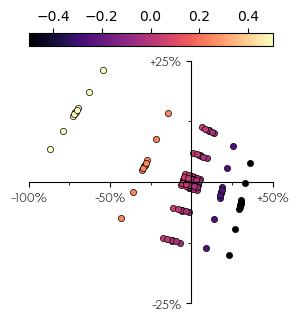

In [ ]:
from matplotlib.font_manager import FontProperties
fontpath = '/Users/seshu/Library/Fonts/TorontoSubwayLight.otf'
labelfont = FontProperties(fname=fontpath,size=14)

f,ax = plt.subplots(1,1,figsize=(8/2.54,10/2.54))
ax.spines.left.set_position('zero')
ax.spines.left.set_color('k')
ax.spines.right.set_color('none')
ax.spines.bottom.set_position('zero')
ax.spines.bottom.set_color('k')
ax.spines.top.set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x_0 = pertdata['<x>'].iloc[0:3].mean()
y_0 = pertdata['<y>'].iloc[0:3].mean()
gamma_0 = pertdata['gamma'].iloc[0:3].mean()
lambda_0 = pertdata['lambda'].iloc[0:3].mean()


for i in range(121):
    indices = [i*3,i*3+1,i*3+2]
    avgloc = pertdata['<x>'].iloc[indices].mean(),pertdata['<y>'].iloc[indices].mean()
    stddev = pertdata['<x>'].iloc[indices].std(),pertdata['<y>'].iloc[indices].std()
    #plt.errorbar(1-avgloc[0]/x_0,1-avgloc[1]/y_0,
    #             xerr=stddev[0]/x_0,yerr=stddev[1]/y_0,
    #             fmt='',elinewidth=0.5,c='k',zorder=2)
    g = plt.scatter(1-avgloc[0]/x_0,1-avgloc[1]/y_0,s=20,c=(1-pertdata['gamma'].iloc[indices].mean()/gamma_0),edgecolors='k',linewidth=0.5,vmin=-0.5,vmax=0.5,cmap='magma')
    

plt.colorbar(g,orientation='horizontal',location='top')

labelfont.set_size(10)
ax = plt.gca()
ax.set_xlim(-0.9,0.5)
ax.set_xticks([-1,-0.5,0.5])
ax.set_xticklabels(['-100%','-50%','+50%'],fontproperties=labelfont)
ax.set_xticks([-0.75,-0.25,0.25],minor=True)


ax.set_ylim(-0.25,0.25)
ax.set_yticks([-0.25,0.25])
ax.set_yticklabels(['-25%','+25%'],fontproperties=labelfont)
ax.set_yticks([-0.125,0.125],minor=True)
#f.savefig('many_perturbations.pdf',format='pdf',bbox_inches='tight')

Text(0.5, 0, '')

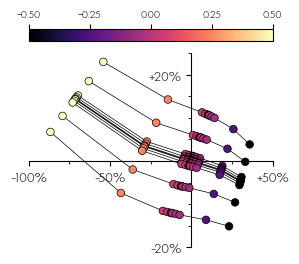

In [ ]:
f,ax = plt.subplots(1,1,figsize=(8/2.54,8/2.54))
ax.spines.left.set_position('zero')
ax.spines.left.set_color('k')
ax.spines.right.set_color('none')
ax.spines.bottom.set_position('zero')
ax.spines.bottom.set_color('k')
ax.spines.top.set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines.left.zorder = -2
ax.spines.bottom.zorder = -2

x_0 = pertdata['<x>'].iloc[0:3].mean()
y_0 = pertdata['<y>'].iloc[0:3].mean()
x_0dev = pertdata['<x>'].iloc[0:3].std()
y_0dev = pertdata['<y>'].iloc[0:3].std()

gamma_0 = pertdata['gamma'].iloc[0:3].mean()
lambda_0 = pertdata['lambda'].iloc[0:3].mean()
points = pertdata[['lambda','gamma','<x>','<y>']].groupby(['lambda','gamma']).mean().reset_index()

foldchange = pd.DataFrame(index=points.index)
foldchange['<x>'] = 1-points['<x>']/x_0
foldchange['<y>'] = 1-points['<y>']/y_0
foldchange['gamma'] = 1-points['gamma']/gamma_0
foldchange['lambda'] = 1-points['lambda']/lambda_0

foldchange.groupby('lambda').plot(x='<x>',y='<y>',ax=ax,legend=False,cmap='magma',zorder=-1,linewidth=0.5)

g = plt.scatter(1-points['<x>']/x_0,1-points['<y>']/y_0,s=30,c=(1-points['gamma']/gamma_0),edgecolors='k',linewidth=0.5,cmap='magma')
cb = plt.colorbar(g,orientation='horizontal',location='top')
labelfont.set_size(10)
for tick in cb.ax.get_xticklabels():
    tick.set_fontproperties(labelfont)
    tick.set_fontsize(8)

ax.set_xlim(-0.9,0.5)
ax.set_xticks([-1,-0.5,0.5])
ax.set_xticklabels(['-100%','-50%','+50%'],fontproperties=labelfont)
ax.set_xticks([-0.75,-0.25,0.25],minor=True)


ax.set_ylim(-0.20,0.25)
ax.set_yticks([-0.20,0.20])
ax.set_yticklabels(['-20%','+20%'],fontproperties=labelfont)
ax.set_yticks([-0.15,-0.1,-0.05,0.05,0.1,0.15,0.25],minor=True)
ax.set_xlabel("")
#f.savefig('many_perturbations.pdf',format='pdf',bbox_inches='tight')

In [ ]:
(0.735-0.7)/0.7

0.050000000000000044

In [ ]:
pointsdev = pertdata[['lambda','gamma','<x>','<y>']].groupby(['lambda','gamma']).std().reset_index()

In [ ]:
points['<x>']

0      52.699133
1      39.115967
2      31.954233
3      31.257700
4      30.699067
         ...    
116    38.169833
117    37.478833
118    36.659767
119    31.109400
120    26.265333
Name: <x>, Length: 121, dtype: float64

In [ ]:
pointsdev2['<x>']/points['<x>']

NameError: name 'pointsdev2' is not defined

<ErrorbarContainer object of 3 artists>

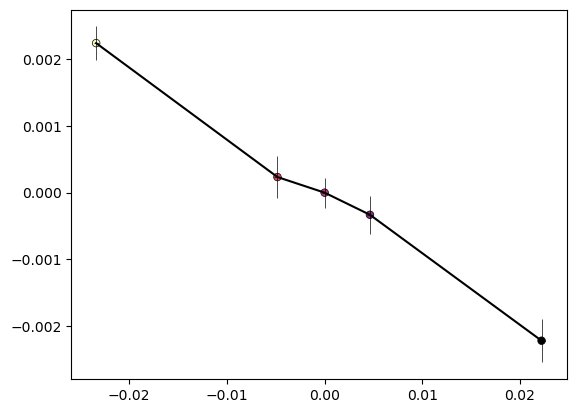

In [ ]:
points2 = points[(points['lambda']==4.5)&(points['gamma'].isin([0.6825, 0.6965, 0.7, 0.7035, 0.7175]))]
pointsdev2 = pointsdev[(pointsdev['lambda']==4.5)&(pointsdev['gamma'].isin([0.6825, 0.6965, 0.7, 0.7035, 0.7175]))]
g = plt.scatter(1-points2['<x>']/x_0,1-points2['<y>']/y_0,s=30,c=(1-points2['gamma']/gamma_0),edgecolors='k',linewidth=0.5,cmap='magma')
plt.errorbar(1-points2['<x>']/x_0,1-points2['<y>']/y_0,
             xerr=pointsdev2['<x>']/points2['<x>'],yerr=pointsdev2['<y>']/points2['<y>'],
             fmt='',elinewidth=0.5,c='k',zorder=2)

In [ ]:
points.groupby('lambda')

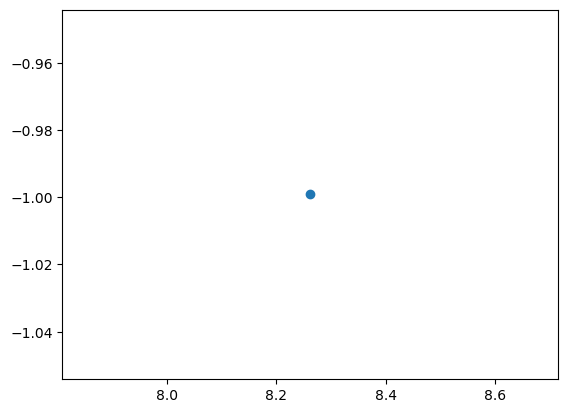

In [ ]:
plt.scatter(bootstrapped_res['E[CVx/CVy]'],bootstrapped_res['E[rhoxy]'])

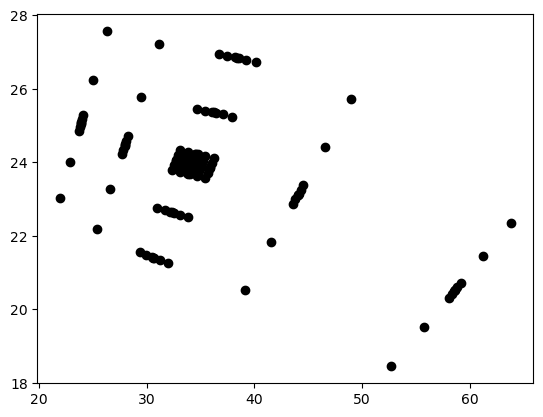

In [ ]:
for i in range(121):
    indices = [i*3,i*3+1,i*3+2]
    avgloc = pertdata['<x>'].iloc[indices].mean(),pertdata['<y>'].iloc[indices].mean()
    stddev = pertdata['<x>'].iloc[indices].std(),pertdata['<y>'].iloc[indices].std()
    plt.errorbar(avgloc[0],avgloc[1],
                 xerr=stddev[0],yerr=stddev[1],
                 fmt='o',elinewidth=0.5,c='k')
  

In [ ]:
bootstrapped_res = pd.DataFrame(bootstrapdicts)
bootstrapped_res.set_index(["fileN",'fileda','filedb','sysname'],inplace=True)

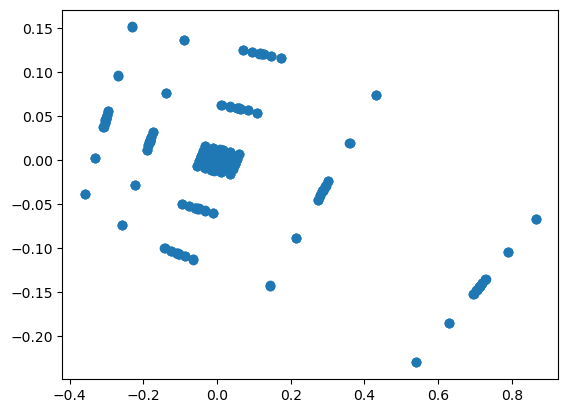

In [ ]:

plt.scatter(pertdata['<x>']/x_0 - 1,pertdata['<y>']/y_0 - 1)

(-0.01, 0.01)

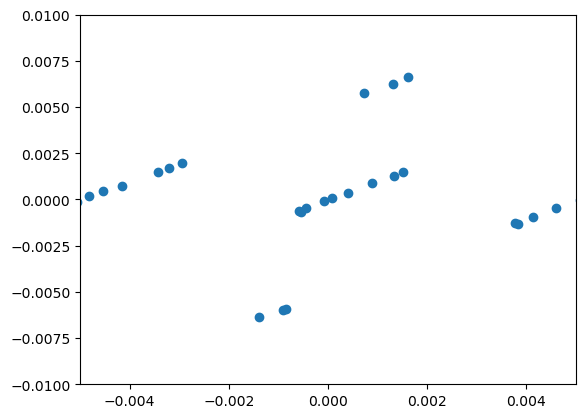

In [ ]:
x_0 = pertdata['<x>'].iloc[0:2].mean()
y_0 = pertdata['<y>'].iloc[0:2].mean()
plt.scatter(pertdata['<x>']/x_0 - 1,pertdata['<y>']/y_0 - 1)
plt.xlim(-0.005,0.005)
plt.ylim(-0.01,0.01)

In [ ]:
(data['gamma'].var(ddof=0)/data['gamma'].mean()**2)/(data['lambda'].var(ddof=0)/data['lambda'].mean()**2)

np.float64(25.00000000000001)

In [ ]:
pertdata.index.get_level_values('filedb').unique()

Index([0.05], dtype='float64', name='filedb')

In [ ]:
pertdata

Exec Time    Sim Time  \
fileN fileda filedb sysname             perturbation                           
25.0  0.01   0.05   09-13 2124/system_0 0               590215.0  65762500.0   
                                        1               604337.0  65743600.0   
                                        2              3071850.0  65753700.0   
                                        3             12349500.0  68732600.0   
                                        4             13692000.0  68741700.0   
...                                                          ...         ...   
                                        358             567924.0  92339200.0   
                                        359             568584.0  92316600.0   
                                        360             232399.0  38421900.0   
                                        361             232451.0  38423300.0   
                                        362             233724.0  38424200.0   

                                                             Steps  \
fileN fileda filedb sysname             perturbation                 
25.0  0.01   0.05   09-13 2124/system_0 0             3.699710e+09   
                                        1             3.699290e+09   
                                        2             3.700850e+09   
                                        3             3.858660e+09   
                                        4             3.857500e+09   
...                                                            ...   
                                        358           4.757740e+09   
                                        359           4.757310e+09   
                                        360           1.922100e+09   
                                        361           1.922710e+09   
                                        362           1.922530e+09   

                                                      Flux Bal x  Flux Bal y  \
fileN fileda filedb sysname             perturbation                           
25.0  0.01   0.05   09-13 2124/system_0 0               0.000168    0.000050   
                                        1               0.000077    0.000017   
                                        2               0.000074    0.000012   
                                        3               0.000079    0.000023   
                                        4               0.000038    0.000025   
...                                                          ...         ...   
                                        358             0.000169    0.000004   
                                        359             0.000080    0.000026   
                                        360             0.000125    0.000039   
                                        361             0.000006    0.000116   
                                        362             0.000072    0.000069   

                                                      Flux Bal z  Cov Bal xx  \
fileN fileda filedb sysname             perturbation                           
25.0  0.01   0.05   09-13 2124/system_0 0               0.000111    0.000170   
                                        1               0.000006    0.000448   
                                        2               0.000096    0.000325   
                                        3               0.000225    0.000458   
                                        4               0.000061    0.000155   
...                                                          ...         ...   
                                        358             0.000164    0.000133   
                                        359             0.000043    0.000241   
                                        360             0.000039    0.000108   
                                        361             0.000184    0.000301   
                                        362             0.000091    0.000468   

                     

In [ ]:
np.sort((1-pertdata['lambda']/lambda_0).unique())

array([-0.1  , -0.05 , -0.01 , -0.005, -0.001,  0.   ,  0.001,  0.005,
        0.01 ,  0.05 ,  0.1  ])

In [ ]:
(pertdata['gamma']/gamma_0).unique()

array([1.   , 1.05 , 0.95 , 1.005, 0.995, 1.025, 0.975, 1.25 , 0.75 ,
       1.5  , 0.5  ])